Enter the number of vertices:  5


Enter the edges (pairs of vertices separated by a space):


Enter an edge (or 'done' to finish):  0 1
Enter an edge (or 'done' to finish):  1 2
Enter an edge (or 'done' to finish):  2 3
Enter an edge (or 'done' to finish):  2 4
Enter an edge (or 'done' to finish):  3 4
Enter an edge (or 'done' to finish):  4


Invalid input. Please enter valid edges.


Enter an edge (or 'done' to finish):  done
Enter the number of colors:  4


Graph coloring: [1, 2, 1, 2, 3]


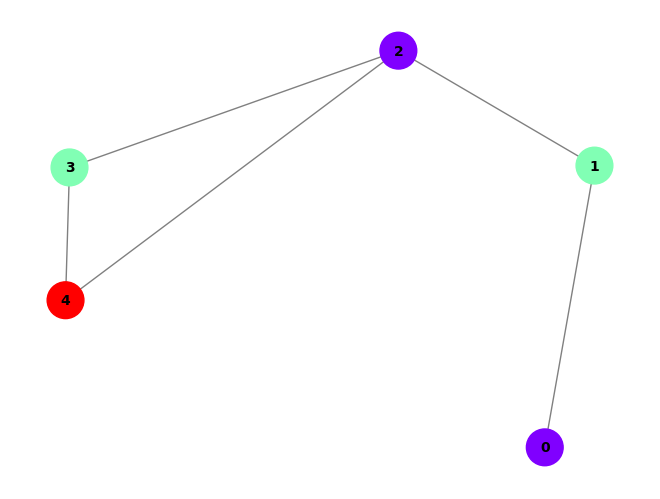

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

def is_safe(graph, vertex, c, color):
    for neighbor in graph[vertex]:
        if c[neighbor] == color:
            return False
    return True

def graph_coloring_util(graph, m, c, vertex):
    if vertex == len(graph):
        return True

    for color in range(1, m + 1):
        if is_safe(graph, vertex, c, color):
            c[vertex] = color
            if graph_coloring_util(graph, m, c, vertex + 1):
                return True
            c[vertex] = 0

    return False

def graph_coloring(graph, num_colors):
    c = [0] * len(graph)
    if not graph_coloring_util(graph, num_colors, c, 0):
        print("No solution exists.")
    else:
        print("Graph coloring:", c)
        return c  # Return the list of colors assigned to each node

def draw_colored_graph(graph, colors):
    G = nx.Graph()

    G.add_nodes_from(graph.keys())
    for u, neighbors in graph.items():
        G.add_edges_from((u, v) for v in neighbors)

    # Draw the graph with node colors based on the graph coloring
    pos = nx.random_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color=colors, cmap=plt.cm.rainbow, font_size=10, font_color="black", font_weight="bold", edge_color="gray")

    # Show the plot
    plt.show()
    
num_vertices = int(input("Enter the number of vertices: "))
graph = {vertex: [] for vertex in range(num_vertices)}
print("Enter the edges (pairs of vertices separated by a space):")
while True:
      try:
          edge = input("Enter an edge (or 'done' to finish): ")
          if edge.lower() == 'done':
              break
          u, v = map(int, edge.split())
          graph[u].append(v)
          graph[v].append(u)
      except ValueError:
           print("Invalid input. Please enter valid edges.")
num_colors = int(input("Enter the number of colors: "))
node_colors = graph_coloring(graph, num_colors)
draw_colored_graph(graph, node_colors)
print()
